**Prática de Histogramas**

1) 
- Produza a imagem ‘negativa’ do arquivo ‘im_cells.png’
- Com a imagem negativa, produza a imagem original novamente. 
- Mostre lado a lado a imagem original e a negativa. Em qual deles os objetos presentes na imagem são melhor percebidos? Justifique.
- Aplique a imagem uma função logarítmica.


In [52]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

In [66]:
def transformacao_logaritmica(img):
    matriz_normalizada = img / 255.0
    img_log = np.log10(matriz_normalizada + 1)
    img_log = np.uint8(255 * img_log / np.max(img_log))
    
    return img_log

Text(0.5, 1.0, 'Original Log')

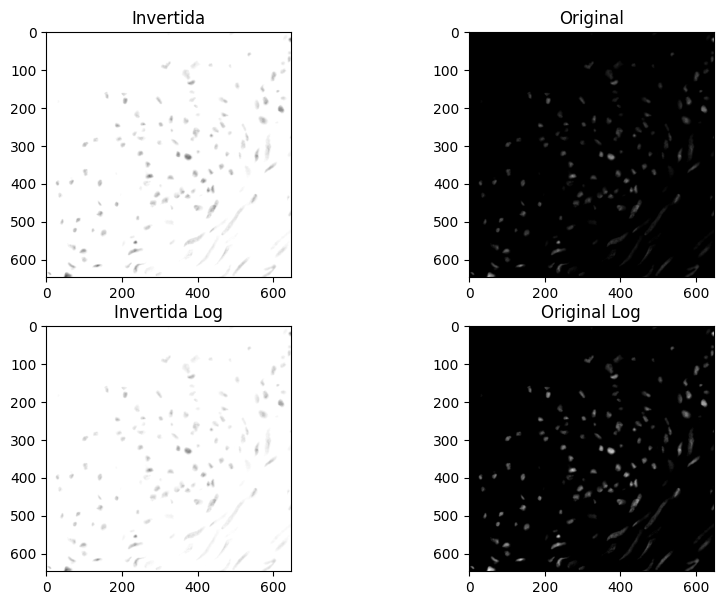

In [69]:
img = cv2.imread("im_cells.png", cv2.IMREAD_GRAYSCALE)

img_invertida = 255 - img
img_original = 255 - img_invertida

img_invertida_log = transformacao_logaritmica(img_invertida)
img_original_log = transformacao_logaritmica(img_original)

# showing image 
fig = plt.figure(figsize=(10, 7)) 

fig.add_subplot(2, 2, 1) 
plt.imshow(img_invertida, cmap='gray', vmin=0, vmax=255)
plt.title("Invertida") 

fig.add_subplot(2, 2, 2) 
plt.imshow(img_original, cmap='gray', vmin=0, vmax=255)
plt.title("Original") 

fig.add_subplot(2, 2, 3) 
plt.imshow(img_invertida_log, cmap='gray', vmin=0, vmax=255)
plt.title("Invertida Log") 

fig.add_subplot(2, 2, 4) 
plt.imshow(img_original_log, cmap='gray', vmin=0, vmax=255)
plt.title("Original Log") 

2)
- Abra a imagem 'pout.tif' e mostre seu histograma.
- Equalize a imagem anterior e mostre novamente seu histograma. Mostra a curva de transformação (consulte https://www.mathworks.com/help/images/histogram-equalization.html)
(procurar função OpenCV)



In [106]:
def equalizar_histograma(image):
    # Passo 1: Calcular o histograma da imagem
    hist, bins = np.histogram(image.flatten(), bins=256, range=[0, 256])
    
    # Passo 2: Calcular a Função de Distribuição Acumulada (CDF)
    cdf = hist.cumsum()
    
    # Passo 3: Normalizar a CDF
    cdf_normalized = cdf * 255 / cdf[-1]
    
    # Passo 4: Arredondar e criar a tabela de mapeamento
    cdf_normalized = np.round(cdf_normalized).astype(np.uint8)
    
    # Passo 5: Aplicar o mapeamento aos valores de pixel
    image_equalized = cdf_normalized[image]
    
    return np.uint8(image_equalized)

In [107]:
def plot_histograma(image, title):
    # Calcular o histograma da imagem
    hist, bins = np.histogram(image.flatten(), bins=256, range=[0, 256])
    
    # Plotar o histograma
    plt.figure(figsize=(10, 5))
    plt.plot(hist, color='black')
    plt.title(title)
    plt.xlabel('Valor do Pixel')
    plt.ylabel('Número de Pixels')
    plt.xlim(0, 255)
    plt.grid(True)
    plt.show()

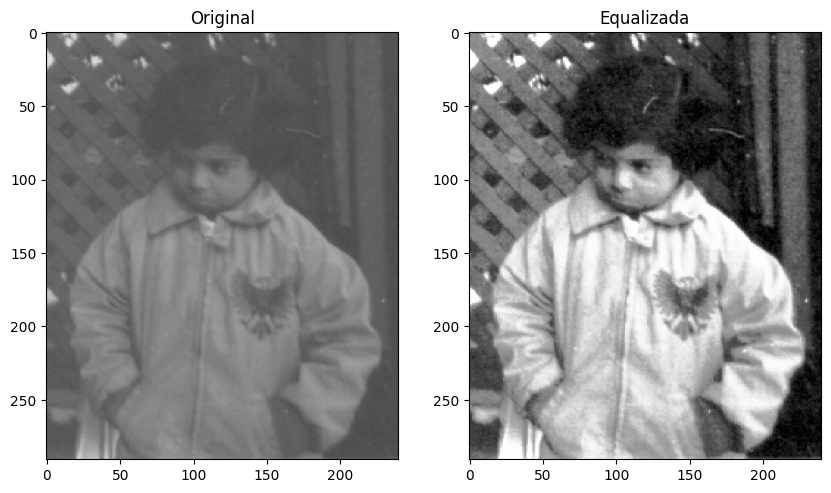

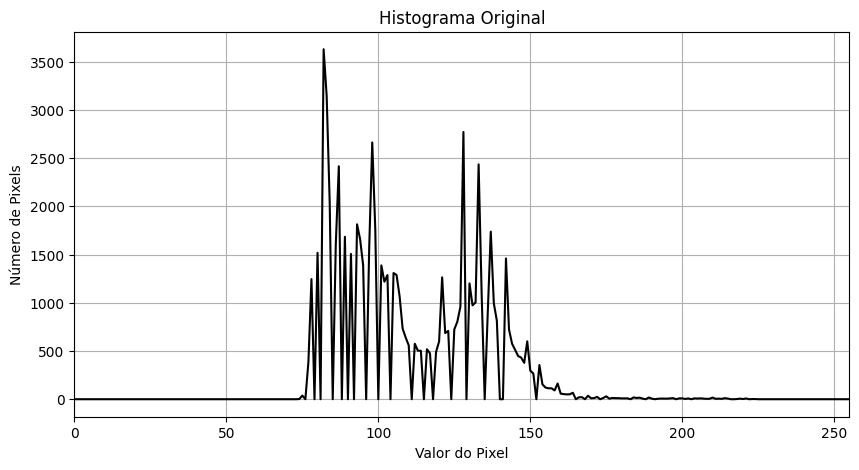

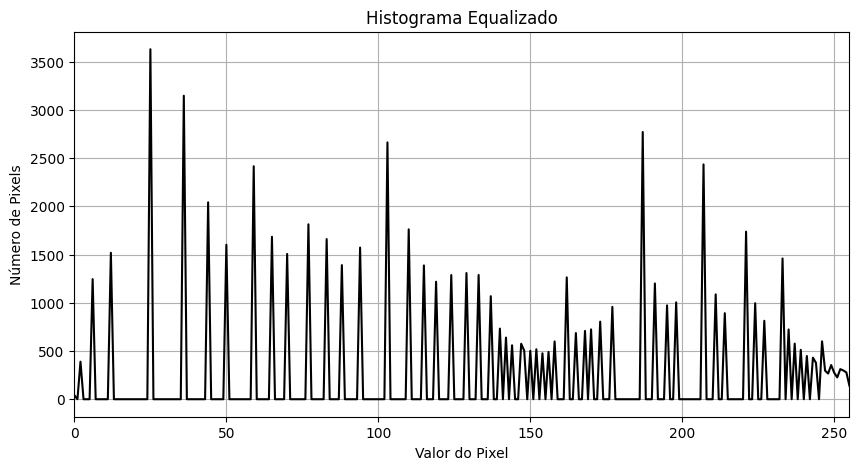

In [108]:
# code here
img = cv2.imread("pout.tif", cv2.IMREAD_GRAYSCALE)
img_equalizada = equalizar_histograma(img)

# showing image 
fig = plt.figure(figsize=(10, 7)) 

fig.add_subplot(1, 2, 1) 
plt.imshow(img, cmap='gray', vmin=0, vmax=255)
plt.title("Original") 

fig.add_subplot(1, 2, 2) 
plt.imshow(img_equalizada, cmap='gray', vmin=0, vmax=255)
plt.title("Equalizada") 

plot_histograma(img, "Histograma Original")
plot_histograma(img_equalizada, "Histograma Equalizado")

3) *Implemente* o algoritmo de equalização de histograma e aplique a imagem ‘imcells.png’. Use o mínimos de laços for - tente realizar operações diretas com matrizes e vetores do numpy
- Aplique o mesmo algortimo 2x na mesma imagem e compare os resultados

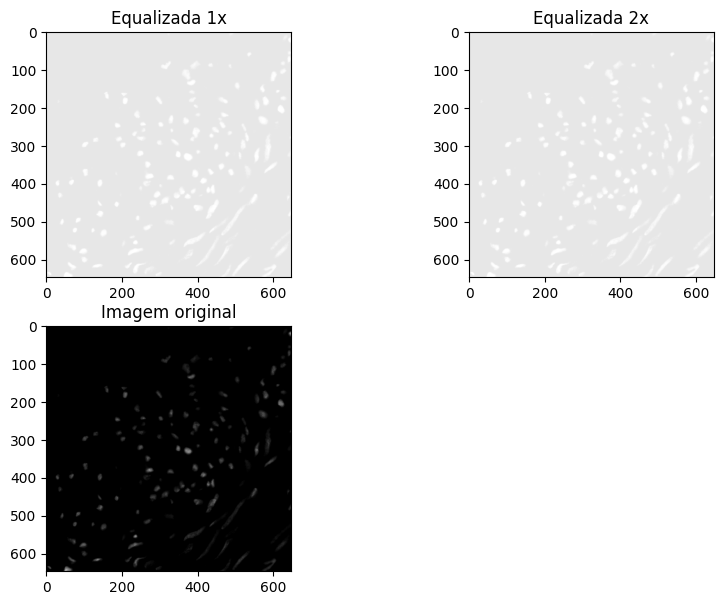

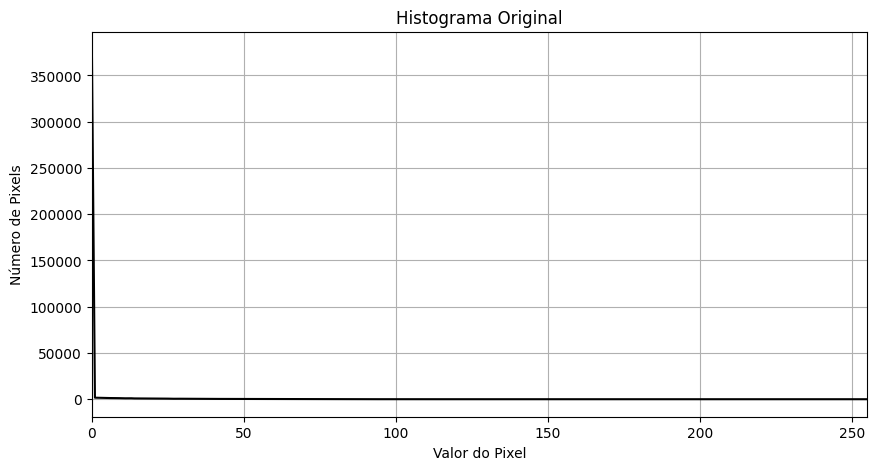

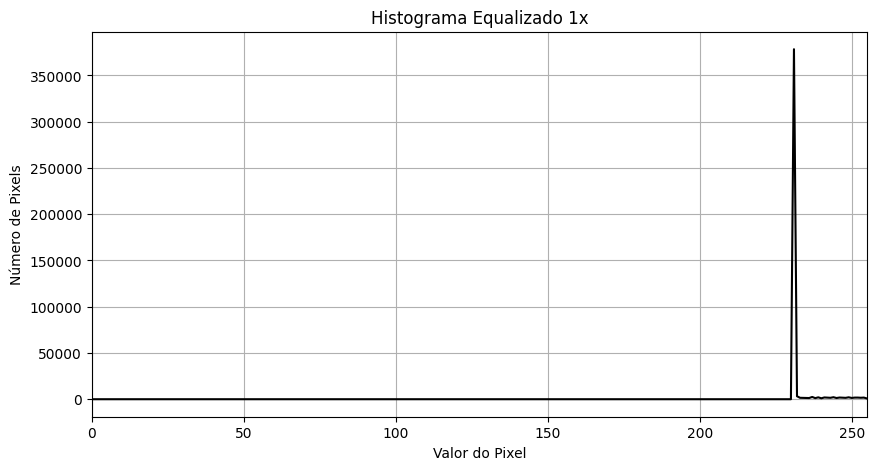

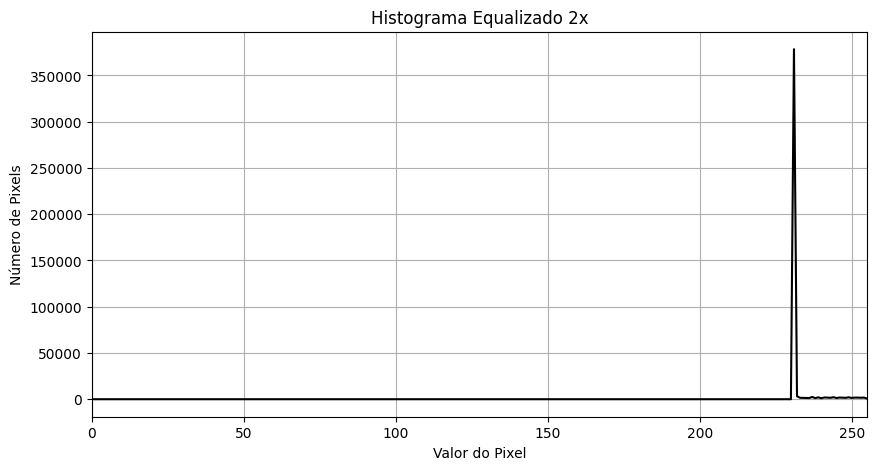

In [111]:
# code here
img = cv2.imread("im_cells.png", cv2.IMREAD_GRAYSCALE)
img_equalizada_1x = equalizar_histograma(img)
img_equalizada_2x = equalizar_histograma(img_equalizada_1x)

# showing image 
fig = plt.figure(figsize=(10, 7)) 

fig.add_subplot(2, 2, 1) 
plt.imshow(img_equalizada_1x, cmap='gray', vmin=0, vmax=255)
plt.title("Equalizada 1x") 

fig.add_subplot(2, 2, 2) 
plt.imshow(img_equalizada_2x, cmap='gray', vmin=0, vmax=255)
plt.title("Equalizada 2x") 

fig.add_subplot(2, 2, 3) 
plt.imshow(img, cmap='gray', vmin=0, vmax=255)
plt.title("Imagem original") 

plot_histograma(img, "Histograma Original")
plot_histograma(img_equalizada_1x, "Histograma Equalizado 1x")
plot_histograma(img_equalizada_2x, "Histograma Equalizado 2x")